In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashionMnist = keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashionMnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
len(y_train)

60000

In [5]:
import numpy as np
import matplotlib.pyplot as plt

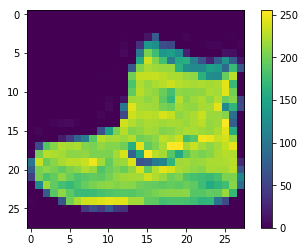

In [7]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [44]:
x_train = keras.utils.normalize(x_train)
x_test = keras.utils.normalize(x_test)

TypeError: 'tuple' object is not callable

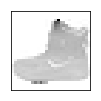

In [153]:
plt.figure(figsize = (10, 10))
for i in range(30):
    plt.subplot(5, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [155]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 11s 190us/sample - loss: 0.4788 - accuracy: 0.8263
Epoch 2/3
60000/60000 [==============================] - 11s 188us/sample - loss: 0.3519 - accuracy: 0.8695
Epoch 3/3
60000/60000 [==============================] - 11s 190us/sample - loss: 0.3162 - accuracy: 0.8826- loss: 0.3161 - ac


In [157]:
model.fit(x_train, y_train, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 11s 188us/sample - loss: 0.2479 - accuracy: 0.9063
Epoch 2/3
60000/60000 [==============================] - 10s 169us/sample - loss: 0.2393 - accuracy: 0.9100
Epoch 3/3
60000/60000 [==============================] - 11s 180us/sample - loss: 0.2280 - accuracy: 0.9138


In [158]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.3402 - accuracy: 0.8836


In [159]:
model.save('new_fashion_mnist_model')

In [8]:
new_model = keras.models.load_model('new_fashion_mnist_model')

In [45]:
predictions = new_model.predict(x_test)

In [46]:
print(y_test[1])
print(np.argmax(predictions[1]))
print (predictions[1])

2
2
[1.4143687e-03 1.1716544e-09 9.9695754e-01 3.5819221e-06 4.1605113e-04
 3.3518542e-11 1.2083140e-03 1.0676894e-12 9.9971125e-08 3.6667159e-11]


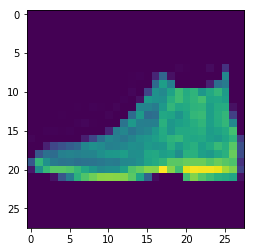

In [76]:
plt.imshow(x_test[0])

In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary) 
    predict_label = np.argmax(predictions_array)
    
    if predict_label == true_label :
        color = "blue"
    else :
        color = "red"
    
    plt.xlabel("{} {:2.0f}%({})".format(class_names[predict_label], 100*np.max(predictions_array), class_names[true_label]), color = color)
    

In [67]:
def plot_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    #print (predictions_array)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predict_label = np.argmax(predictions_array)
    thisplot[predict_label].set_color('red')
    thisplot[true_label].set_color('blue')


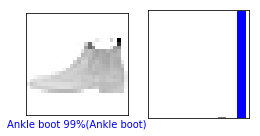

In [74]:
i = 0
plt.figure(figsize = (4, 2))
plt.subplot(1, 2, 1)
plot_image(i, predictions, y_test, x_test)

plt.subplot(1, 2, 2)
plot_array(i, predictions, y_test)

plt.show()


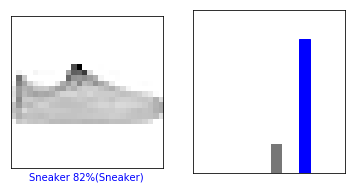

7
7


In [69]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_array(i, predictions,  y_test)
plt.show()
print (np.argmax(predictions[i]))
print (y_test[i])

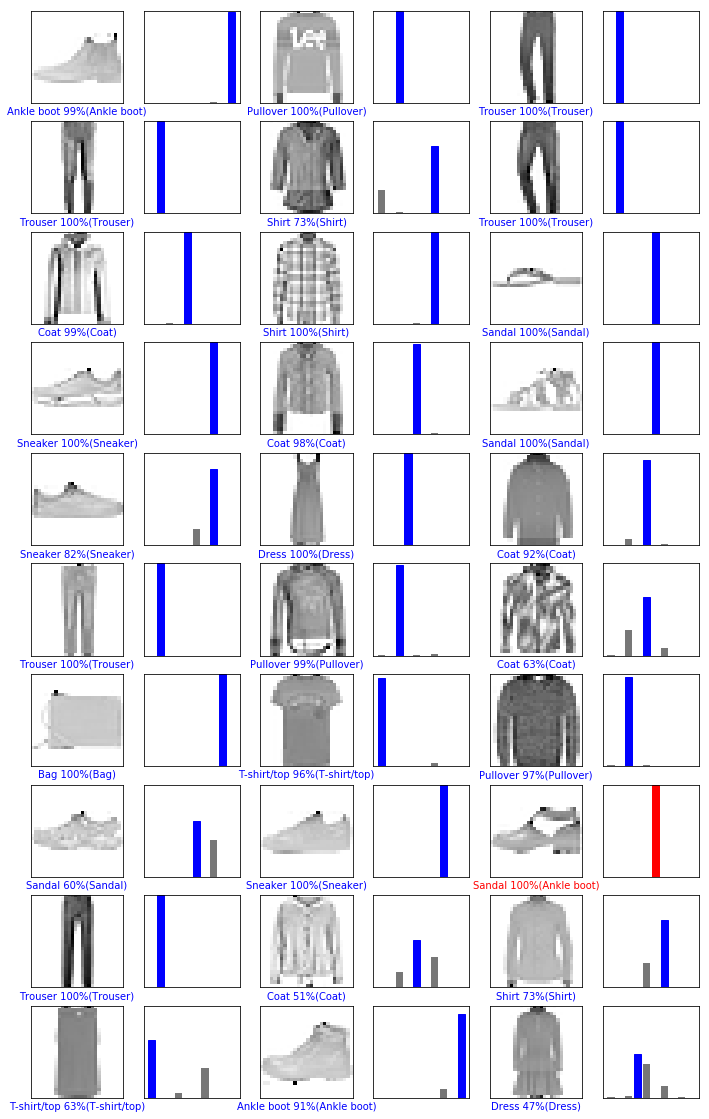

In [84]:
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images) :
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, y_test, x_test)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_array(i, predictions, y_test)
plt.show()